# Quick Feature Analysis 

Goal: Understand the most important features that influence value_eur. 

In [2]:
# # Import necessary libraries #Make sure pandas is installed in environment
import pandas as pd

# Load the datasets
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
submission = pd.read_csv('../data/submission.csv')

# Appy Cleaning before finding Correlation of features
 

In [3]:
# Columns to drop
columns_to_drop = [
    'player_traits', 'player_tags', 'club_loaned_from', 'nation_jersey_number', 
    'nation_position', 'goal_keeping_speed']

# Numerical Columns to Fill with Median
numerical_cols = [
    'release_clause_eur', 'defending', 'dribbling', 'pace',
    'passing', 'physic', 'shooting', 'wage_eur']
# (Exclude club_jersey_number: not relevant)

# Categorical Columns to Fill with 'Unknown'
categorical_cols = [
    'club_name', 'club_position', 'league_name', 'club_contract_valid_until']# 1. DROP columns -> too many missing values + not critical for predicting market value
train.drop(columns=columns_to_drop, inplace=True, errors='ignore')
test.drop(columns=columns_to_drop, inplace=True, errors='ignore')
# Quick check : dropped columns
print("Dropped columns from train:", columns_to_drop)
print("Dropped columns from test:", columns_to_drop)

# 2. FILL numerical columns -> with median
for column in numerical_cols: 
    median_value = train[column].median()
    train[column] = train[column].fillna(median_value)
    test[column] = test[column].fillna(median_value)
# Quick check: filled numerical columns
print("Train numerical columns after filling:", train[numerical_cols].isnull().sum())
print("Test numerical columns after filling:", test[numerical_cols].isnull().sum())

# 3. FILL categorical columns -> with 'Unknown'
for column in categorical_cols:
    train[column] = train[column].fillna('Unknown')
    test[column] = test[column].fillna('Unknown')   
# Quick check: filled categorical columns
print("Train categorical columns after filling:", train[categorical_cols].isnull().sum())
print("Test categorical columns after filling:", test[categorical_cols].isnull().sum())

#4. FILL remaining missing values -> with 'Unknown'
train.fillna('Unknown', inplace=True)
test.fillna('Unknown', inplace=True)
# Last check: filled remaining missing values
print("Remaining missing values in train:", train.isnull().sum().sum())
print("Remaining missing values in test:", test.isnull().sum().sum())


Dropped columns from train: ['player_traits', 'player_tags', 'club_loaned_from', 'nation_jersey_number', 'nation_position', 'goal_keeping_speed']
Dropped columns from test: ['player_traits', 'player_tags', 'club_loaned_from', 'nation_jersey_number', 'nation_position', 'goal_keeping_speed']
Train numerical columns after filling: release_clause_eur    0
defending             0
dribbling             0
pace                  0
passing               0
physic                0
shooting              0
wage_eur              0
dtype: int64
Test numerical columns after filling: release_clause_eur    0
defending             0
dribbling             0
pace                  0
passing               0
physic                0
shooting              0
wage_eur              0
dtype: int64
Train categorical columns after filling: club_name                    0
club_position                0
league_name                  0
club_contract_valid_until    0
dtype: int64
Test categorical columns after filling: club

C:\Users\Albin\AppData\Local\Temp\ipykernel_32136\411403165.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train.fillna('Unknown', inplace=True)
C:\Users\Albin\AppData\Local\Temp\ipykernel_32136\411403165.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test.fillna('Unknown', inplace=True)


# 1.1 ----1.2 Martyyy

# 1.3 Calculate correlation matrix with value_eur 

In [4]:
print(train.columns.tolist()) #Current Train features 

['Unnamed: 0', 'id', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name', 'league_name', 'league_level', 'club_position', 'club_jersey_number', 'club_joined', 'club_contract_valid_until', 'nationality_id', 'nationality_name', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interception

Removing  that don't help predict value_eur — like names, IDs, etc.

| Column Name             | Why Remove?                                                     |
|--------------------------|------------------------------------------------------------------|
| player_id                | Just an ID (no meaning)                                          |
| short_name               | Name text (not useful)                                           |
| long_name                | Name text (not useful)                                           |
| player_face_url          | Image URL (useless for ML)                                       |
| club_logo_url            | Image URL                                                       |
| dob                      | Raw date of birth (could engineer age, but raw date is messy)    |
| nationality_name         | Not helpful directly for skill                                  |
| club_name                | Club name (changes value based on club prestige, but too noisy) |
| club_position            | (optional) depends on what you want                             |
| league_name              | League text (not skill itself)                                  |
| club_contract_valid_until| (optional) can keep or drop                                      |


In [5]:
# Remove unimportant identity columns before correlation
columns_to_remove = [
    'id', 'short_name', 'long_name', 'player_face_url', 
    'club_logo_url', 'dob', 'nationality_name', 
    'club_name', 'league_name', 'club_contract_valid_until'
]

# Drop from train_features
train= train.drop(columns=columns_to_remove, errors='ignore')

print("Remaining columns for correlation:", train.columns.tolist())


Remaining columns for correlation: ['Unnamed: 0', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_team_id', 'league_level', 'club_position', 'club_jersey_number', 'club_joined', 'nationality_id', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality

In [8]:
print(train['value_eur'].dtype)
print(train['value_eur'].isnull().sum())

object
0


Correlation among features and features with Value_eur 

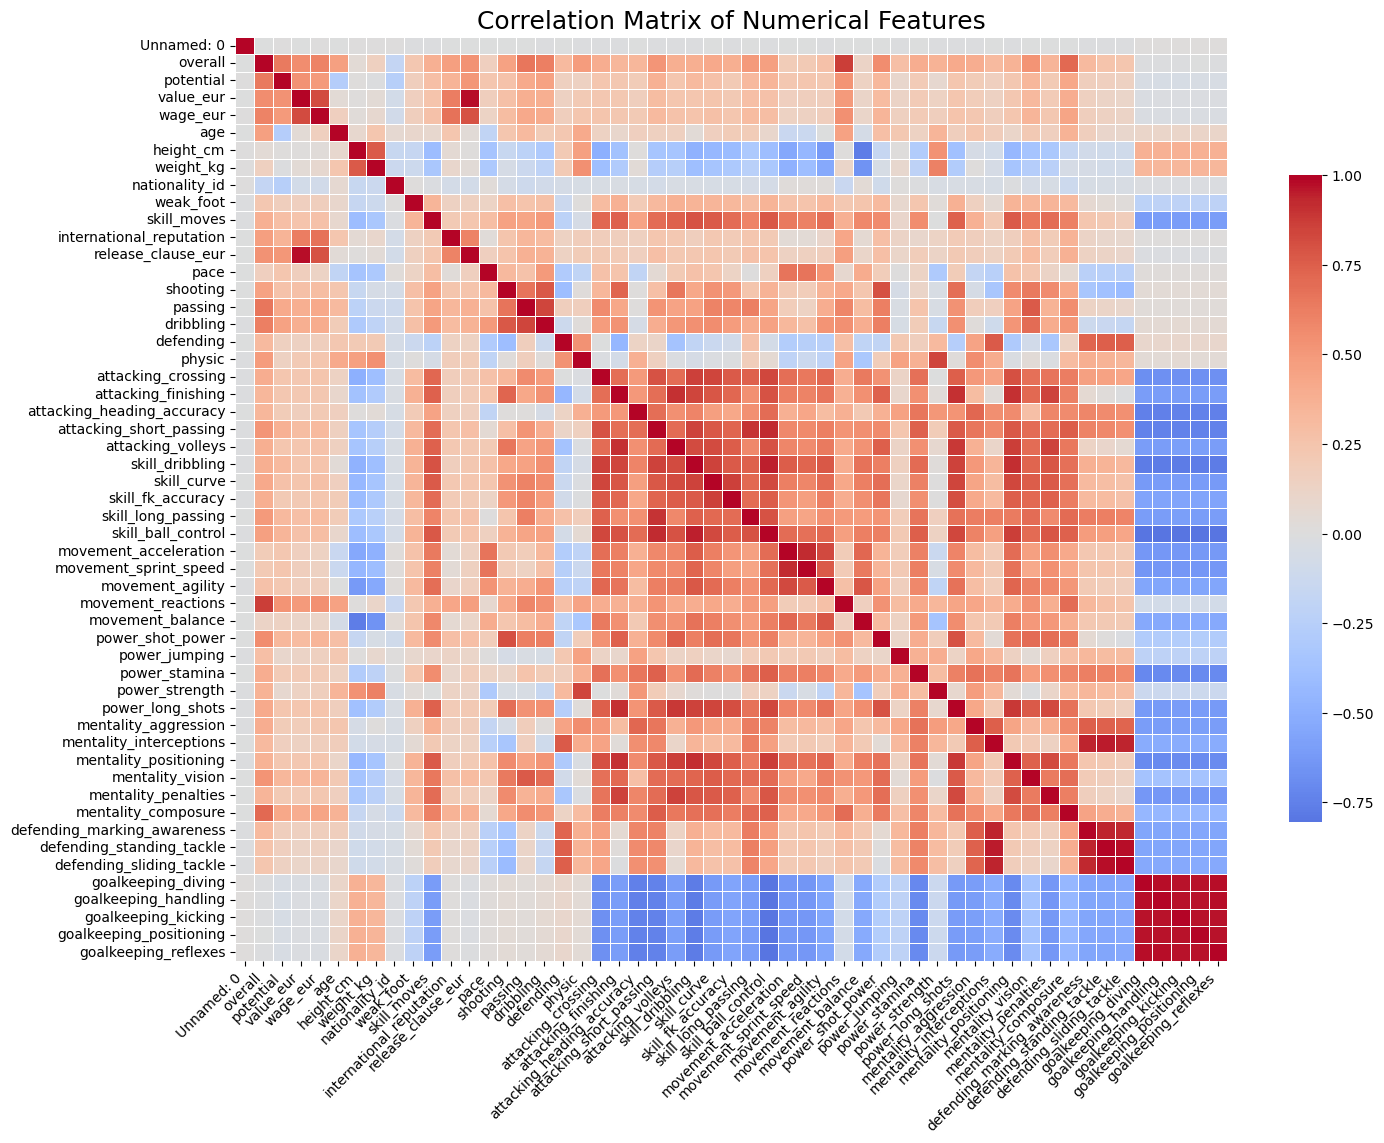

In [9]:
import pandas as pd
import seaborn as sns  #Make sure you have seaborn and Matplot package
import matplotlib.pyplot as plt

# 1. Select only numerical columns (exclude categorical ones)
# Convert value_eur to numeric if needed
train['value_eur'] = pd.to_numeric(train['value_eur'], errors='coerce')
train_numerical = train.select_dtypes(include=['number'])

# 2. Calculate the full correlation matrix
correlations = train_numerical.corr()

# 3. Visualize the full correlation matrix
# 3. Create a better styled heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, 
            cmap='coolwarm', 
            center=0, 
            annot=False, 
            fmt='.2f', 
            linewidths=0.5, 
            cbar_kws={'shrink': 0.7})
plt.title('Correlation Matrix of Numerical Features', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

## 1. 4 Top 10 Correlated Features with Value_eur 

🔼 Top 10 Positive Correlations with value_eur:

release_clause_eur          0.977850
wage_eur                    0.823054
international_reputation    0.632083
overall                     0.558455
potential                   0.528645
movement_reactions          0.497302
mentality_composure         0.392885
passing                     0.385069
dribbling                   0.383161
mentality_vision            0.324678
power_shot_power            0.306210
attacking_short_passing     0.299035
skill_long_passing          0.280389
shooting                    0.275910
skill_ball_control          0.270058
skill_moves                 0.254593
skill_curve                 0.251268
skill_dribbling             0.241493
attacking_volleys           0.239990
power_long_shots            0.231810
Name: value_eur, dtype: float64

🔽 Top 10 Negative Correlations with value_eur:

nationality_id                -0.084814
goalkeeping_diving            -0.023647
goalkeeping_handling          -0.022864
goalkeeping

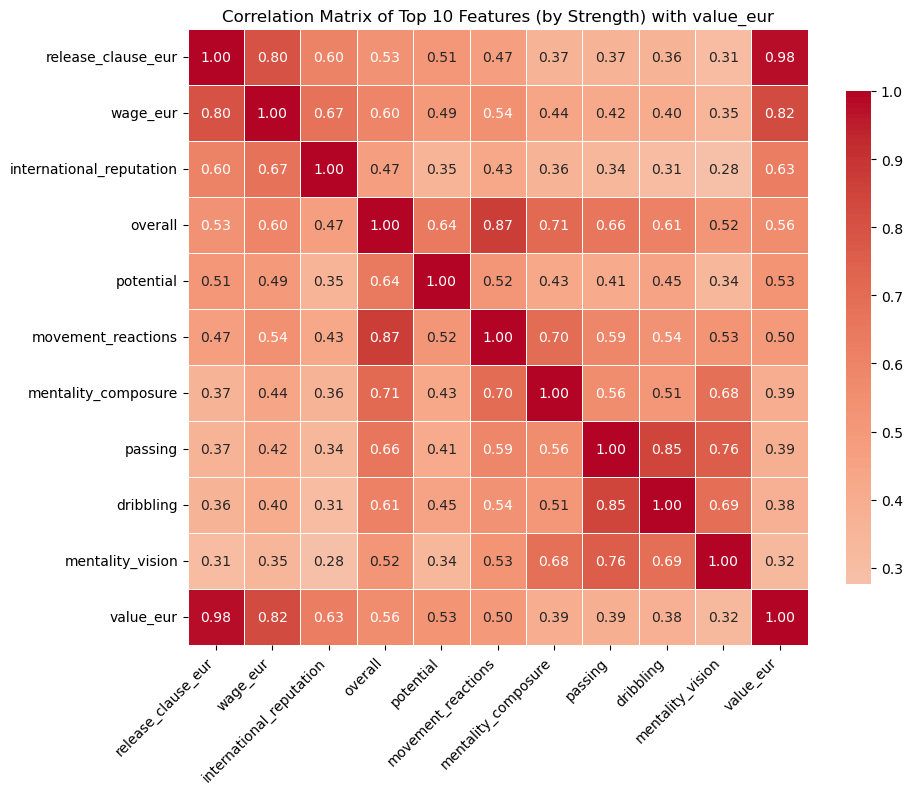

In [ ]:
#Find correlation of features with value_eur
value_corr = correlations['value_eur'].drop('value_eur')  # remove self-correlation

# Top 10 positively correlated features
top10_pos = value_corr.sort_values(ascending=False).head(10) 

# Top 10 negatively correlated features
top10_neg = value_corr.sort_values(ascending=True).head(10)

# Display
print("🔼 Top 10 Positive Correlations with value_eur:\n")
print(top10_pos)

print("\n🔽 Top 10 Negative Correlations with value_eur:\n")
print(top10_neg)

# Get Top 10 strongest correlations (positive OR negative) Using absolute 
top10_features = value_corr.abs().sort_values(ascending=False).head(10).index.tolist()
print("\n🔽 Top 10 Absolute Correlations with value_eur:\n")
print(top10_features)
# Create a correlation matrix of these 10 + value_eur
selected_features = top10_features + ['value_eur']
top10_corr_matrix = train_numerical[selected_features].corr()

# Plot heatmap among the top 10 to check for multicorrelation
plt.figure(figsize=(10, 8))
sns.heatmap(top10_corr_matrix,
            cmap='coolwarm',
            center=0,
            annot=True,
            fmt='.2f',
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Top 10 Features (by Strength) with value_eur')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

## 1.5  Small Analysis on Correlation

From the full correlation matrix, we selected the Top 10 features most correlated with the target variable `value_eur`.

These features are highly informative and should be prioritized in model training, as they have a strong direct relationship with the player's market value.

However, when analyzing the focused heatmap, we notice that some of these top features are also highly correlated with each other. 
This situation is called **multicollinearity**, and it can cause problems for linear models by making coefficient estimates unstable.

✅ For tree-based models (e.g., Random Forest, XGBoost), multicollinearity is less of a problem.

⚠️ If we use linear models (e.g., Linear Regression), we might need to:
- Remove one of two highly correlated features
- Apply regularization (like Lasso Regression)

In conclusion, the Top 10 correlated features are a strong base for building predictive models, but careful selection or model choice is needed to handle possible multicollinearity.

# 2. Prepare Final Dataset for Modeling 

This heatmap helps identify overlapping signals — features that are highly correlated with each other (r > 0.85) — and informs which ones to drop for a more stable model.


🔍 Top 20 Features Most Correlated with value_eur:
  1. release_clause_eur
  2. wage_eur
  3. international_reputation
  4. overall
  5. potential
  6. movement_reactions
  7. mentality_composure
  8. passing
  9. dribbling
  10. mentality_vision
  11. power_shot_power
  12. attacking_short_passing
  13. skill_long_passing
  14. shooting
  15. skill_ball_control
  16. skill_moves
  17. skill_curve
  18. skill_dribbling
  19. attacking_volleys
  20. power_long_shots


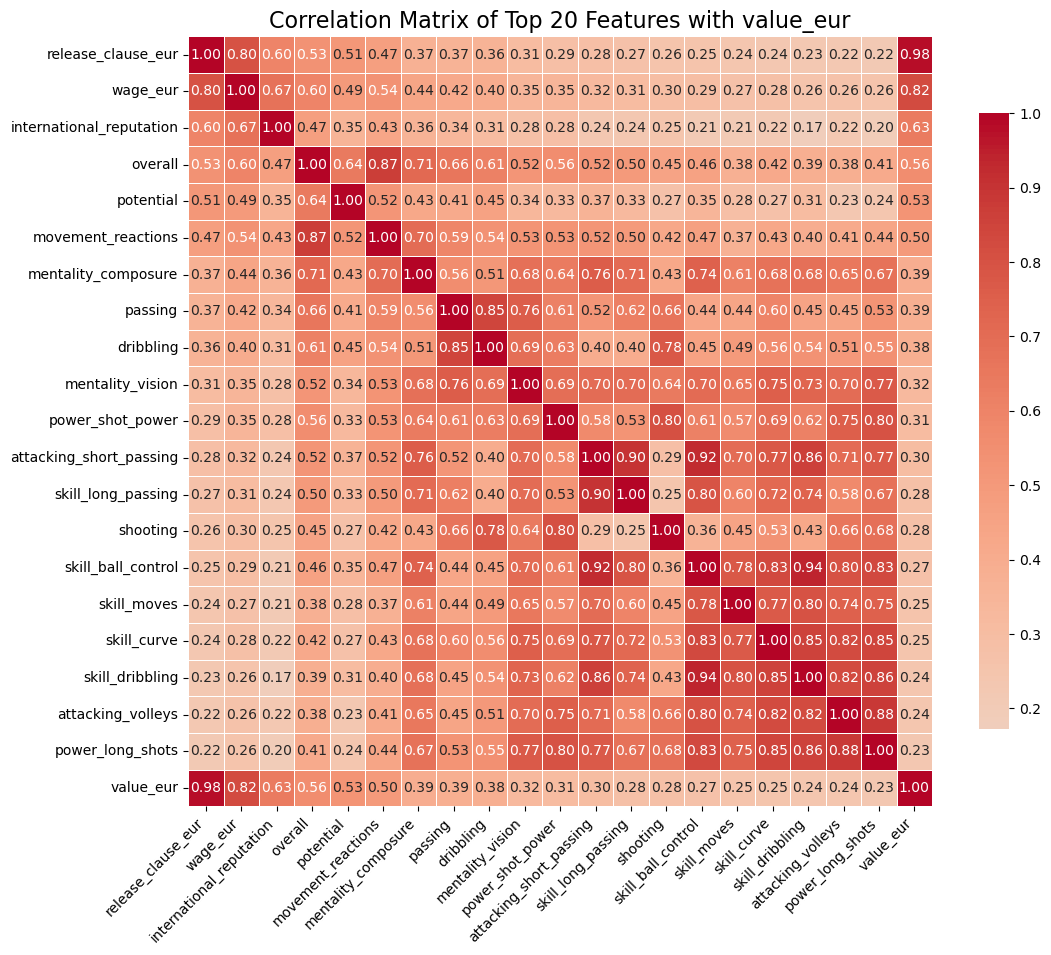


🔗 Highly Correlated Feature Pairs (r > 0.85):
  - overall ↔ movement_reactions  |  Correlation: 0.87
  - attacking_short_passing ↔ skill_long_passing  |  Correlation: 0.9
  - attacking_short_passing ↔ skill_ball_control  |  Correlation: 0.92
  - attacking_short_passing ↔ skill_dribbling  |  Correlation: 0.86
  - skill_ball_control ↔ skill_dribbling  |  Correlation: 0.94
  - skill_curve ↔ skill_dribbling  |  Correlation: 0.85
  - skill_dribbling ↔ power_long_shots  |  Correlation: 0.86
  - attacking_volleys ↔ power_long_shots  |  Correlation: 0.88

✅ Final Features after Removing Multicollinearity:
  1. release_clause_eur
  2. wage_eur
  3. international_reputation
  4. overall
  5. potential
  6. mentality_composure
  7. passing
  8. dribbling
  9. mentality_vision
  10. power_shot_power
  11. attacking_short_passing
  12. shooting
  13. skill_moves
  14. skill_curve
  15. attacking_volleys


In [ ]:
import numpy as np
# Reselect top 20 absolute correlation with value_eur  
top20_features = value_corr.abs().sort_values(ascending=False).head(20).index.tolist()
print("\n🔍 Top 20 Features Most Correlated with value_eur:")
for i, feat in enumerate(top20_features, 1):
    print(f"  {i}. {feat}")
# Create a correlation matrix of the selected features
corr_matrix = train_numerical[top20_features].corr().abs()

# Add 'value_eur' back for heatmap comparison
top20_plus_value = top20_features + ['value_eur']

# Correlation matrix for heatmap
top20_corr_matrix = train_numerical[top20_plus_value].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(top20_corr_matrix,
            cmap='coolwarm',
            center=0,
            annot=True,
            fmt='.2f',
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Top 20 Features with value_eur', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Keep upper triangle (no duplicates)
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify highly correlated pairs (above threshold)
high_corr_pairs = []
for col in upper_triangle.columns:
    for row in upper_triangle.index:
        corr_value = upper_triangle.loc[row, col]
        if pd.notnull(corr_value) and corr_value > 0.85:
            high_corr_pairs.append((row, col, round(corr_value, 2)))

# Print high correlation pairs
print("\n🔗 Highly Correlated Feature Pairs (r > 0.85):")
if high_corr_pairs:
    for row, col, score in high_corr_pairs:
        print(f"  - {row} ↔ {col}  |  Correlation: {score}")
else:
    print("  None found.")

# Remove one feature from each pair (keep the first, drop the second)
redundant_features = {col for _, col, _ in high_corr_pairs}
final_selected_features = [f for f in top20_features if f not in redundant_features]

# Final list of selected features
print("\n✅ Final Features after Removing Multicollinearity:")
for i, feat in enumerate(final_selected_features, 1):
    print(f"  {i}. {feat}")

Define Final X_train, y_train, X_test. The selected features can be picked from the final top 15

In [20]:
# 1. Select Top 10 final features after multicollinearity removal
top10_final_features = final_selected_features[:10]

print("\n📌 Top 10 Final Features for Modeling:")
for i, feat in enumerate(top10_final_features, 1):
    print(f"  {i}. {feat}")

# 2. Define target variable
y_train = train['value_eur']

# 3. Define input features
X_train = train[top10_final_features]

# 4. Prepare test features (same columns)
X_test = test[top10_final_features]


📌 Top 10 Final Features for Modeling:
  1. release_clause_eur
  2. wage_eur
  3. international_reputation
  4. overall
  5. potential
  6. mentality_composure
  7. passing
  8. dribbling
  9. mentality_vision
  10. power_shot_power
